In [181]:
import pandas as pd

In [182]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [183]:
# 강수량 가져오기
precip = pd.read_csv('강수량 2000_.csv', encoding = 'cp949')
precip.head()

,행정구역별,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전국(평균),1289.7,997.3,1470.6,1861.0,1456.9,1286.4,1424.3,1450.1,988.7,...,1479.1,1162.9,1173.8,949.0,1272.5,967.8,1386.9,1193.0,1627.0,1249.2
1,서울특별시,1186.8,1386.0,1388.0,2012.0,1499.1,1358.4,1681.9,1212.3,1356.3,...,1646.3,1403.8,808.9,792.1,991.7,1233.2,1284.1,891.3,1651.1,1186.5
2,부산광역시,1248.5,1171.3,2085.2,2328.3,1386.5,1383.9,1528.3,1276.5,1168.3,...,1983.3,1130.1,1693.1,1396.7,1760.2,1014.4,1778.6,1623.2,2281.6,1807.8
3,대구광역시,1087.3,878.3,1291.3,1749.9,1222.4,834.3,1131.5,973.9,761.4,...,1189.9,571.2,1047.6,548.5,1227.3,663.7,1297.6,995.7,1244.9,910.0
4,인천광역시,772.0,979.7,919.6,1403.5,1175.2,1040.1,1044.8,1168.0,1121.0,...,1221.6,1107.9,595.3,633.8,899.7,724.4,1012.6,864.7,1335.7,1068.4


In [184]:
# 기온 가져오기
temp = pd.read_csv('기온2000_.csv', encoding = 'cp949')
temp.head()

,행정구역별(1),2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전국(평균),12.5,12.7,12.6,12.5,13.2,12.3,12.9,13.2,12.9,...,12.3,12.9,13.1,13.4,13.6,13.1,13.0,13.3,13.0,13.3
1,서울특별시,12.7,12.8,12.9,12.8,13.3,12.1,13.0,13.3,12.9,...,12.2,12.5,13.4,13.6,13.6,13.0,12.9,13.5,13.2,13.7
2,부산광역시,14.9,15.3,14.7,14.3,14.9,13.8,14.7,15.3,15.0,...,14.5,15.3,15.1,15.4,15.7,15.2,15.1,15.7,15.2,15.7
3,대구광역시,14.2,14.8,14.1,13.8,14.8,14.2,14.6,15.0,14.6,...,14.1,15.0,14.5,14.8,14.6,14.4,14.1,14.8,14.5,14.6
4,인천광역시,11.7,11.5,11.6,11.3,12.0,11.2,11.8,12.1,12.0,...,11.1,11.1,12.1,12.3,12.4,11.9,11.6,12.5,12.3,12.7


In [185]:
rain_list = []
for i in range(2000, 2022):
    rain_list.append(float(precip.loc[1][f'{i}']))
rain_list

[1186.8,
 1386.0,
 1388.0,
 2012.0,
 1499.1,
 1358.4,
 1681.9,
 1212.3,
 1356.3,
 1564.0,
 2043.5,
 2039.3,
 1646.3,
 1403.8,
 808.9,
 792.1,
 991.7,
 1233.2,
 1284.1,
 891.3,
 1651.1,
 1186.5]

In [186]:
year = pd.DataFrame()

In [187]:
year_list = [str(i) for i in range(2000, 2022)]
year['연도'] = year_list
year

,연도
0,2000
1,2001
2,2002
3,2003
4,2004
5,2005
6,2006
7,2007
8,2008
9,2009


In [188]:
year['강수량'] = rain_list
year

,연도,강수량
0,2000,1186.8
1,2001,1386.0
2,2002,1388.0
3,2003,2012.0
4,2004,1499.1
5,2005,1358.4
6,2006,1681.9
7,2007,1212.3
8,2008,1356.3
9,2009,1564.0


In [189]:
year = year.set_index('연도')
year

,강수량
연도,
2000,1186.8
2001,1386.0
2002,1388.0
2003,2012.0
2004,1499.1
2005,1358.4
2006,1681.9
2007,1212.3
2008,1356.3


<AxesSubplot:title={'center':'서울시 강수량 평균'}, xlabel='연도'>

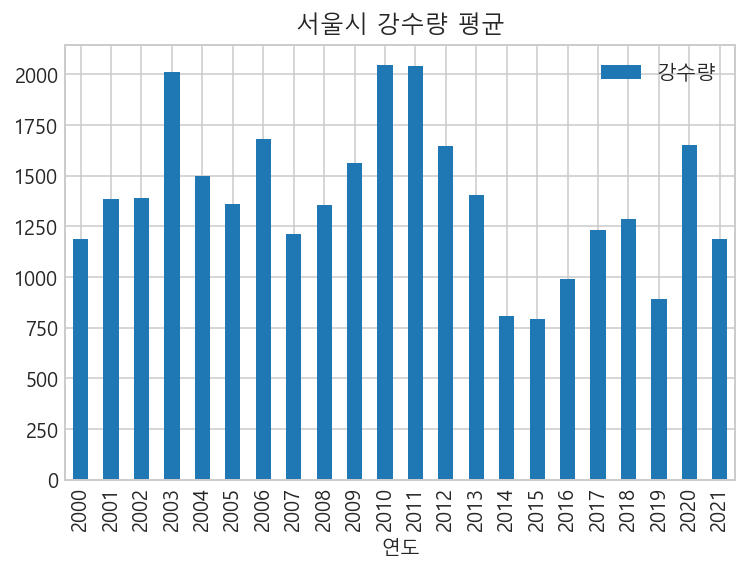

In [190]:
year.plot.bar(title = '서울시 강수량 평균')

In [191]:
year.head()

,강수량
연도,
2000,1186.8
2001,1386.0
2002,1388.0
2003,2012.0
2004,1499.1


In [192]:
temp_list = []
for i in range(2000,2022):
    temp_list.append(float(temp.loc[1][f'{i}']))
year['기온'] = temp_list
year.head()

,강수량,기온
연도,,
2000,1186.8,12.7
2001,1386.0,12.8
2002,1388.0,12.9
2003,2012.0,12.8
2004,1499.1,13.3


<AxesSubplot:title={'center':'서울시 강수량과 기온'}, xlabel='연도'>

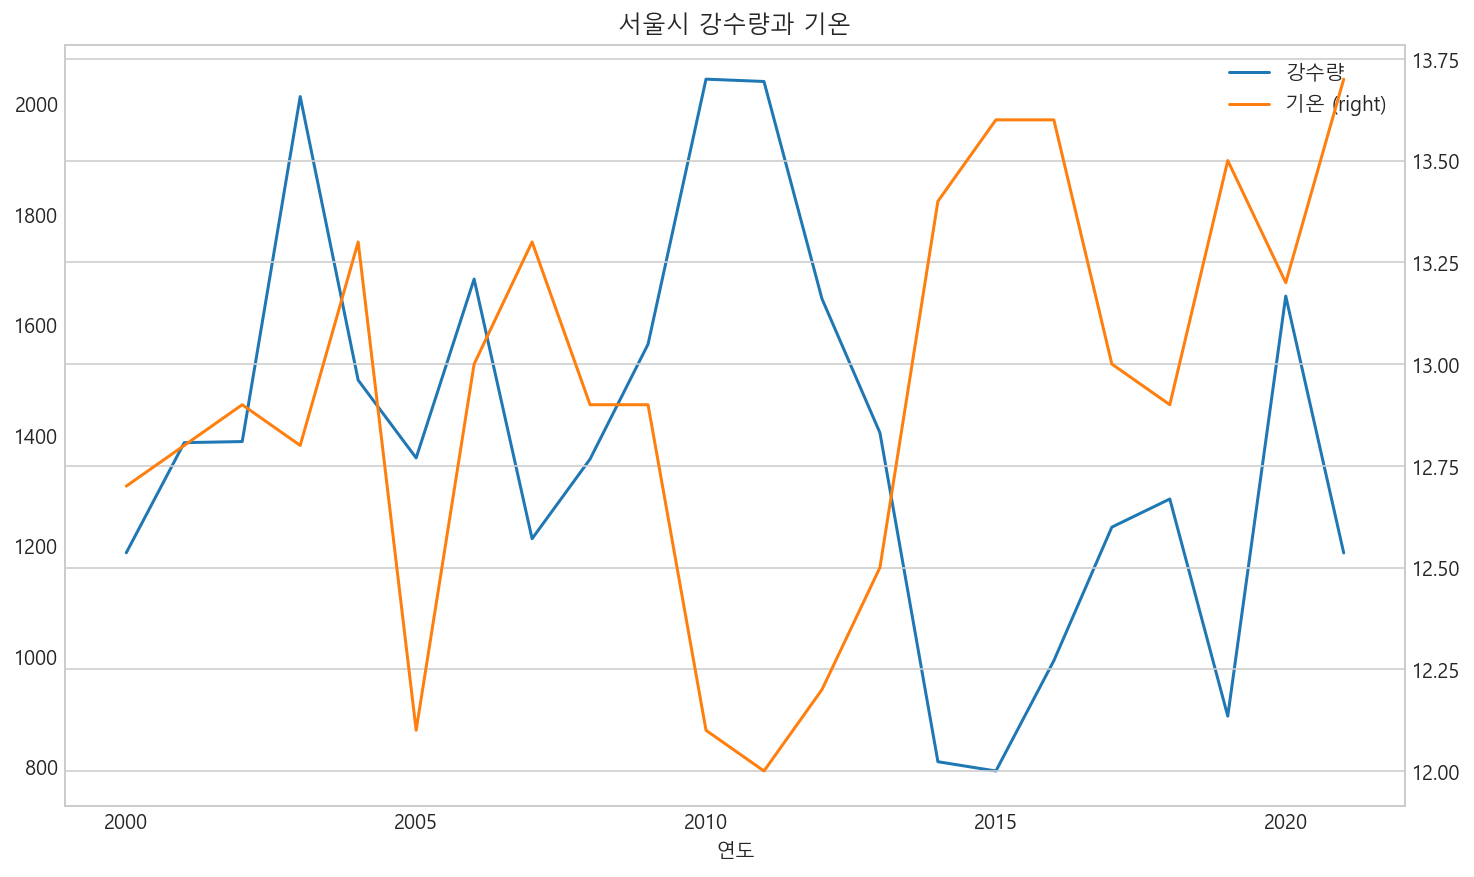

In [193]:
year.plot(secondary_y = '기온', figsize = (12,7), title = '서울시 강수량과 기온')